   # STOCK PRICE PREDICITION 

# 1. Import Lirary

In [1]:
import numpy as np                    
import pandas as pd                    
from sklearn import metrics
%matplotlib inline                     
import matplotlib.pyplot as plt        
from sklearn.model_selection import train_test_split

# 2. Loading Dataset

In [2]:
stock = pd.read_csv('INR=X.csv')
stock 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,71.639999,0
...,...,...,...,...,...,...,...
257,2021-01-20,73.192001,73.192299,72.899300,73.191902,73.191902,0
258,2021-01-21,72.907898,73.045303,72.883003,72.910896,72.910896,0
259,2021-01-22,72.954903,73.237503,72.929001,72.954903,72.954903,0
260,2021-01-25,72.995903,73.220001,72.877998,72.995903,72.995903,0


In [3]:
stock.shape

(262, 7)

In [4]:
stock['Date'] = pd.to_datetime(stock.Date)

In [5]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,71.639999,0


In [6]:
stock.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
257,2021-01-20,73.192001,73.192299,72.899300,73.191902,73.191902,0
258,2021-01-21,72.907898,73.045303,72.883003,72.910896,72.910896,0
259,2021-01-22,72.954903,73.237503,72.929001,72.954903,72.954903,0
260,2021-01-25,72.995903,73.220001,72.877998,72.995903,72.995903,0
261,2021-01-26,72.970001,73.222000,72.774498,72.970001,72.970001,0


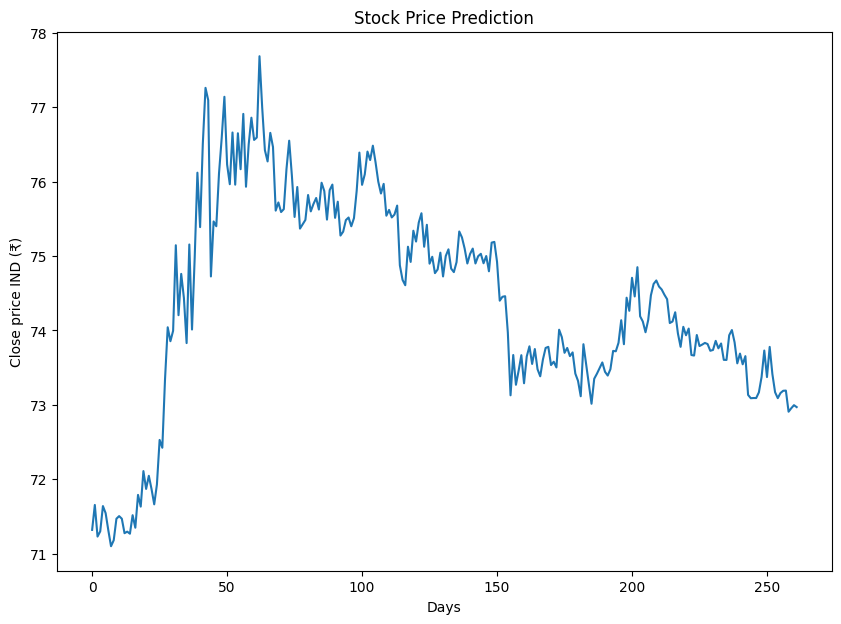

In [7]:
plt.figure(figsize=(10,7))
plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Close price IND (₹)')
plt.plot(stock['Open'])
plt.show()

In [8]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       262 non-null    datetime64[ns]
 1   Open       262 non-null    float64       
 2   High       262 non-null    float64       
 3   Low        262 non-null    float64       
 4   Close      262 non-null    float64       
 5   Adj Close  262 non-null    float64       
 6   Volume     262 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 14.5 KB


# 3. Data Preprocessing

Converting cateogerical value to numeric value

In [9]:
stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.0
mean,74.373533,74.631087,74.011048,74.358489,74.358489,0.0
std,1.417620,1.494521,1.311330,1.426245,1.426245,0.0
min,71.100403,71.279999,71.064003,71.099998,71.099998,0.0
25%,73.546175,73.706577,73.202003,73.531049,73.531049,0.0
50%,74.332001,74.531300,73.881748,74.275799,74.275799,0.0
75%,75.484551,75.737499,75.067053,75.489424,75.489424,0.0
max,77.684998,77.754997,76.496300,77.570000,77.570000,0.0


In [10]:
stock.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
257,False,False,False,False,False,False,False
258,False,False,False,False,False,False,False
259,False,False,False,False,False,False,False
260,False,False,False,False,False,False,False


In [11]:
stock.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
print(len(stock))

262


<AxesSubplot:>

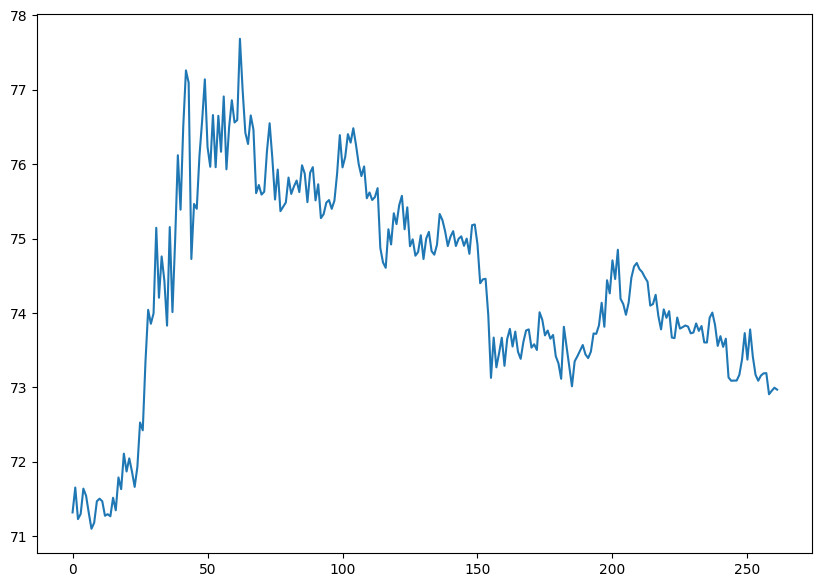

In [13]:
stock['Open'].plot(figsize=(10,7))

<AxesSubplot:>

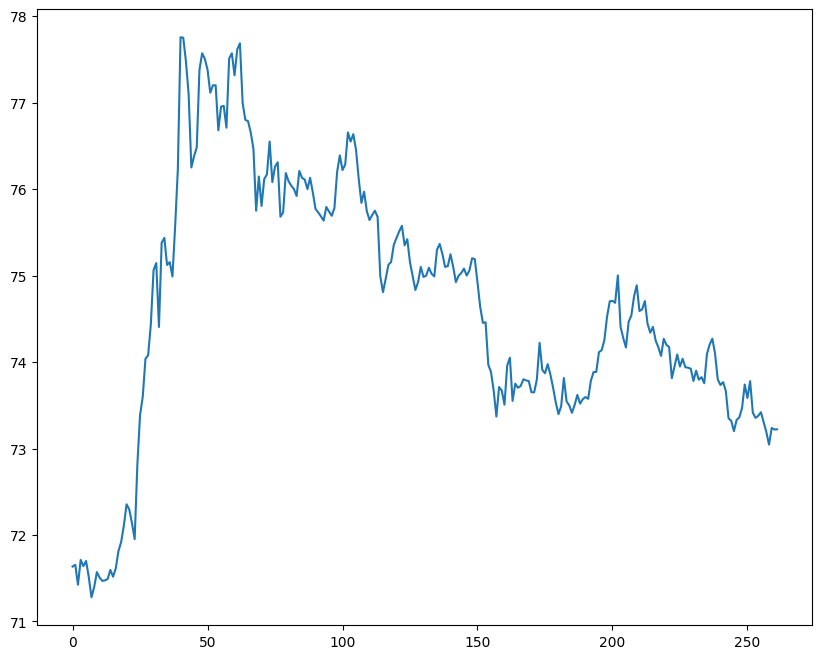

In [14]:
stock['High'].plot(figsize=(10,8))

<AxesSubplot:>

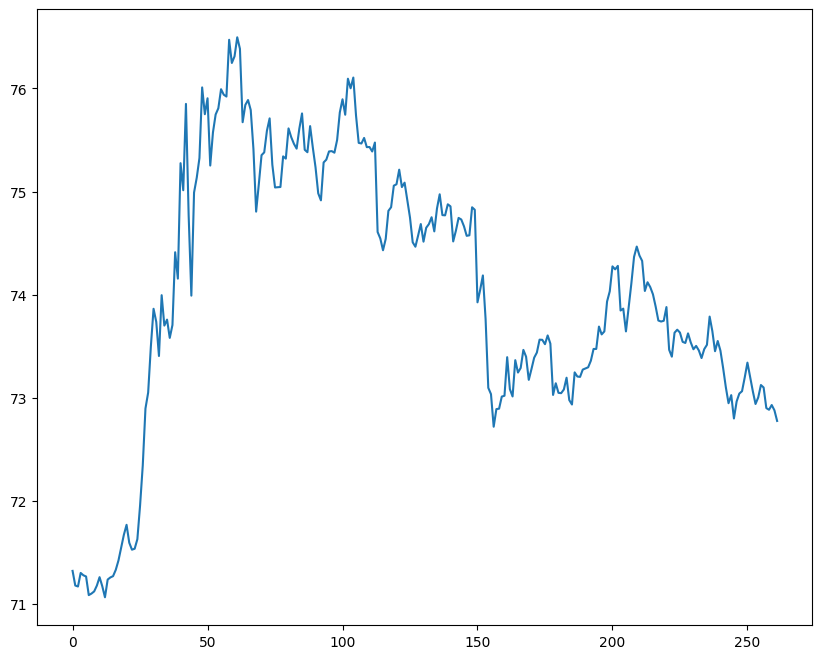

In [15]:
stock['Low'].plot(figsize=(10,8))

In [16]:
print(stock.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


<AxesSubplot:>

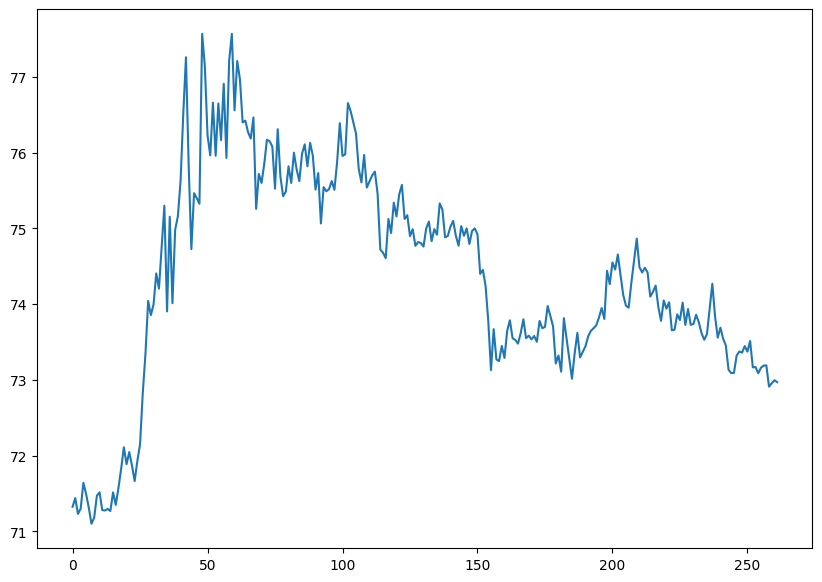

In [17]:
stock['Close'].plot(figsize=(10,7))

<AxesSubplot:>

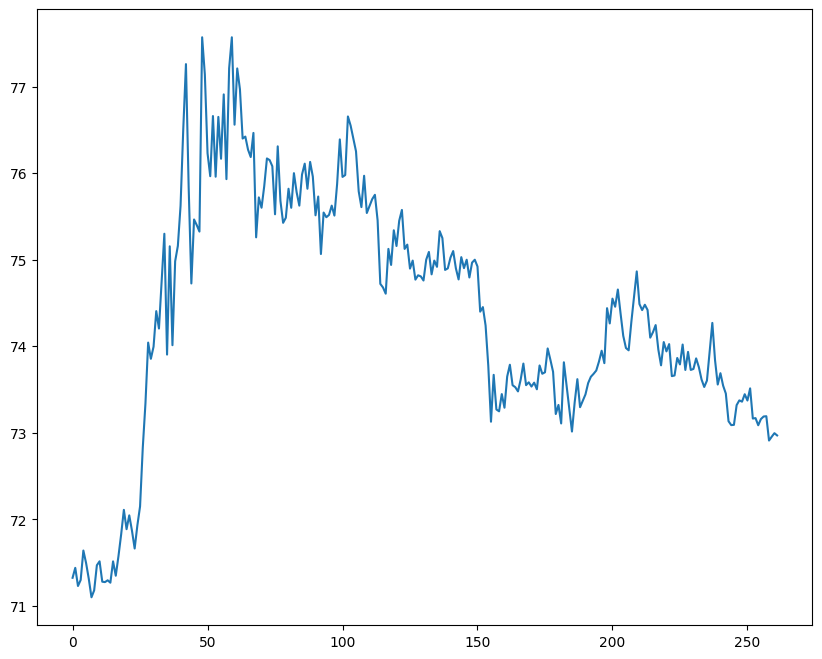

In [18]:
stock['Adj Close'].plot(figsize=(10,8))

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Adj Close'}>],
       [<AxesSubplot:title={'center':'Volume'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

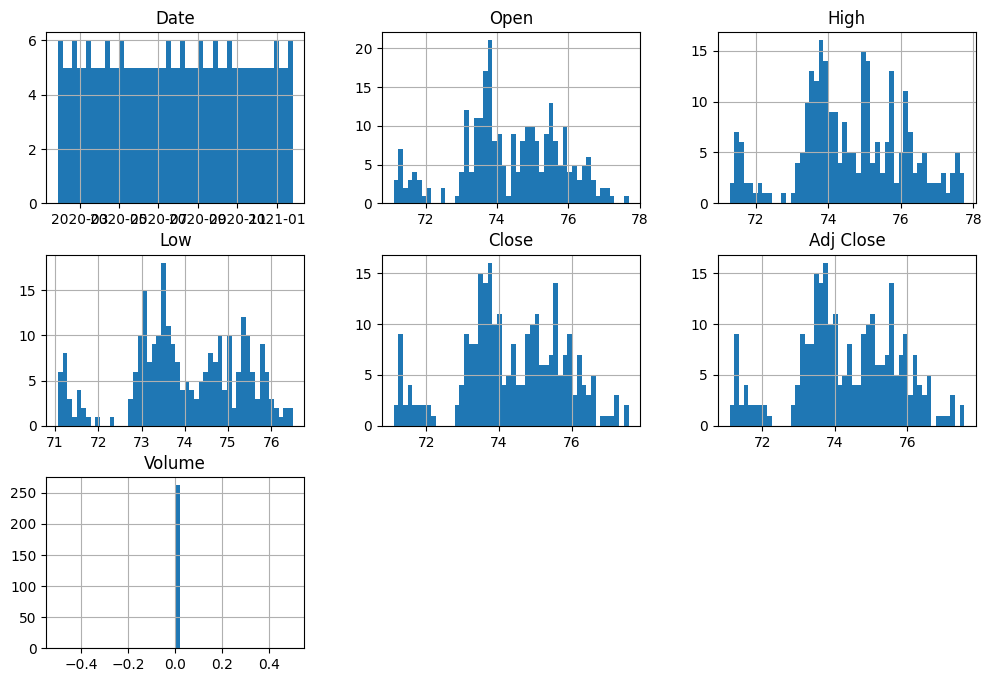

In [19]:
stock.hist(figsize=(12,8),bins=50)

In [20]:
X = stock[['Open','High','Low','Volume']]
y = stock['Close']

In [21]:
X_train,X_test,y_train,y_test=train=train_test_split(X,y,random_state=0)

In [22]:
X_train.shape

(196, 4)

In [23]:
# Printing the size of X testing dataset

X_test.shape

(66, 4)

In [24]:
y_train.shape

(196,)

In [25]:
y_test.shape

(66,)

# 4. Model Building

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [27]:
model=LinearRegression()

In [28]:
model.fit(X_train,y_train)

LinearRegression()

In [29]:
print(model.coef_)

[0.53647069 0.15791653 0.3309628  0.        ]


In [30]:
print(model.intercept_)

-1.8268454177522813


In [31]:
predicted = model.predict(X_test)

In [32]:
print(X_test)

          Open       High        Low  Volume
194  73.720001  73.885300  73.473000       0
153  74.459999  74.459999  73.763901       0
145  74.902802  75.080002  74.662399       0
8    71.181000  71.397499  71.121002       0
111  75.518799  75.699997  75.388496       0
..         ...        ...        ...     ...
184  73.280502  73.497299  72.976997       0
15   71.517700  71.517700  71.268997       0
178  73.705002  73.705002  73.027000       0
96   75.399803  75.691002  75.391899       0
18   71.632896  71.919502  71.547401       0

[66 rows x 4 columns]


In [33]:
predicted.shape

(66,)

In [34]:
dframe = pd.DataFrame(y_test,predicted)

In [35]:
dfr = pd.DataFrame({'Actual':y_test,'predicted':predicted})

In [36]:
print(dfr)

        Actual  predicted
194  73.720001  73.706314
153  74.240097  74.290333
145  74.902802  74.923162
8    71.180000  71.172926
111  75.699997  75.591845
..         ...        ...
184  73.280502  73.245106
15   71.514801  71.421518
178  73.705002  73.522186
96   75.625000  75.527713
18   71.827499  71.638910

[66 rows x 2 columns]


In [37]:
dfr.head()

,Actual,predicted
194,73.720001,73.706314
153,74.240097,74.290333
145,74.902802,74.923162
8,71.180000,71.172926
111,75.699997,75.591845


In [38]:
dfr.tail()

,Actual,predicted
184,73.280502,73.245106
15,71.514801,71.421518
178,73.705002,73.522186
96,75.625000,75.527713
18,71.827499,71.638910


In [39]:
model.score(X_test,y_test)

0.9870262629707015

# 5. Data Evaluation

In [40]:
import math

In [41]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 0.11407780267796443


In [42]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predicted))

Mean Squared Error: 0.02628101790193927


In [43]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 0.16211421252295946


In [44]:
graph=dfr.head(25)

<AxesSubplot:>

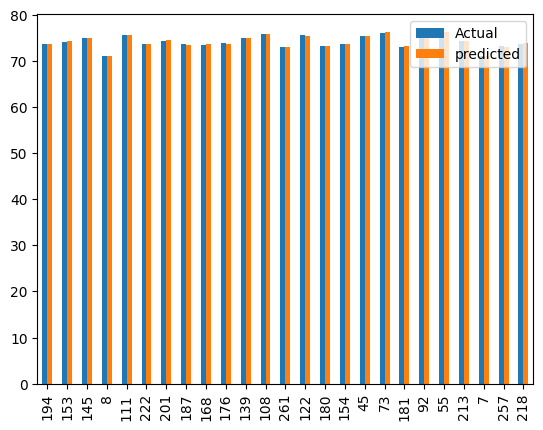

In [45]:
graph.plot(kind = 'bar')

# Conclusion

# #This Algorithm performed well,


# #simple linear regression means that we can predict a dependent variable from an independent one, so whenever we need to know from the beginning each time we add information. 

## We created custom input and tested it, in Building Predictive System section it also worked properly.

# #Thats it we are done with Linear Regression Algorithm.....!!!